In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np

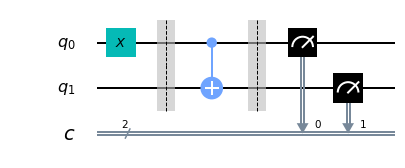

In [5]:
measure_z = QuantumCircuit(2,2)
measure_z.x(0)
measure_z.barrier()
measure_z.cx(0,1)
measure_z.barrier()
measure_z.measure(0,0)
measure_z.measure(1,1)
measure_z.draw(output='mpl')

Results for z measurement:


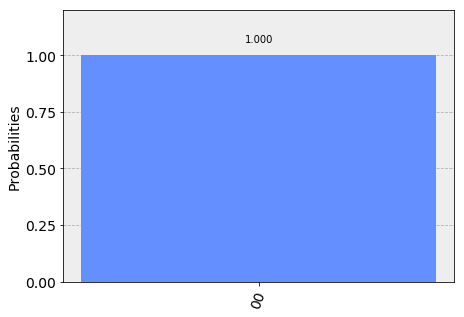

In [31]:
print('Results for z measurement:')
counts = execute(measure_z, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

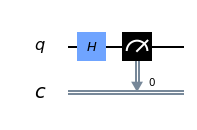

In [32]:
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)
measure_x.draw(output='mpl')

Results for x measurement:


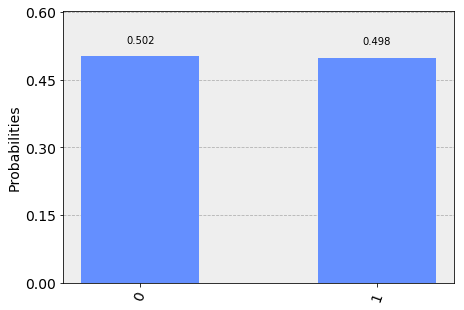

In [33]:
print('Results for x measurement:')
counts = execute(measure_x,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [62]:
input1 = 1
input2 = 1

q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
c = ClassicalRegister(1) # a bit to store the output
qc = QuantumCircuit(q, c) # this is where the quantum program goes
if input1 == 1:
    qc.x(q[0])
if input2 == 1:
    qc.x(q[1])
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO

# We'll run the program on a simulator
backend = Aer.get_backend('qasm_simulator')
# Since the output will be deterministic, we can use just a single shot to get it
job = execute(qc,backend,shots=1,memory=True)
output = job.result().get_memory()[0]

print(f"Input {input1} {input2} -> {output}")

Input 1 1 -> 1


In [56]:
def XOR(input1,input2):
    
    q = QuantumRegister(2) # two qubits in which to encode and manipulate the input
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes

    if input1 == 1:
        qc.x(q[0])
    if input2 == 1:
        qc.x(q[1])
        
    qc.cx(q[0], q[1])
    qc.measure(q[1],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    print(f"Input {input1} {input2} -> {output}")
    return output

In [57]:
print('\nResults for the XOR gate')
for input1 in [0, 1]:
    for input2 in [0, 1]:
        print('    Inputs',input1,input2,'give output',XOR(input1,input2))


Results for the XOR gate
Input 0 0 -> 0
    Inputs 0 0 give output 0
Input 0 1 -> 1
    Inputs 0 1 give output 1
Input 1 0 -> 1
    Inputs 1 0 give output 1
Input 1 1 -> 0
    Inputs 1 1 give output 0
